In [1]:
import numpy as np
import pickle
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#optional formatting for pandas
pd.options.display.float_format = '{:.6f}'.format

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA


# Import

In [2]:
path = './Datasets/segmentation data.csv'

df_segmentation = pd.read_csv(path, index_col=0)

df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [3]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.038000,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.599780,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.000000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.000000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.000000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.000000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.000000,309364.000000,2.000000,2.000000


# Correlation Estimate 

In [4]:
df_segmentation.corr(numeric_only=True)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


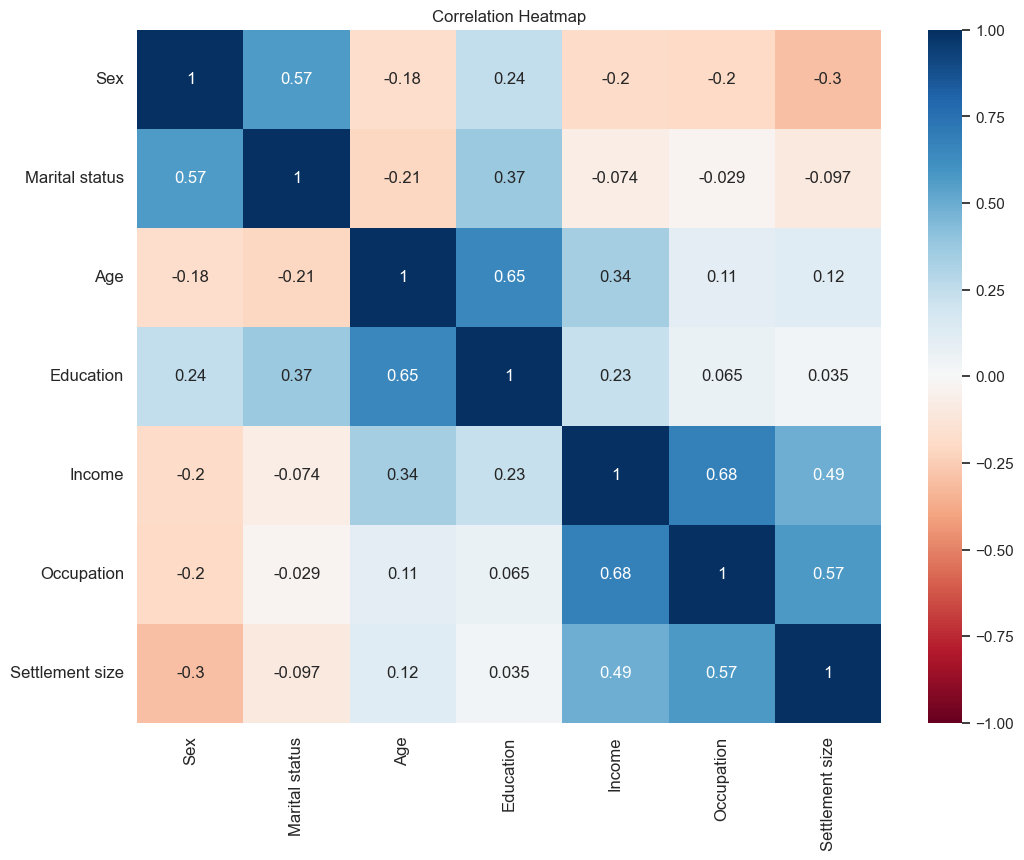

In [5]:
plt.figure(figsize= (12,9))
s = sns.heatmap(df_segmentation.corr(numeric_only=True),
                                    annot= True,
                                    cmap = 'RdBu',
                                    vmin=-1,
                                    vmax=1)

s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

# Raw Data

Text(0.5, 1.0, 'Visualizing Raw Data')

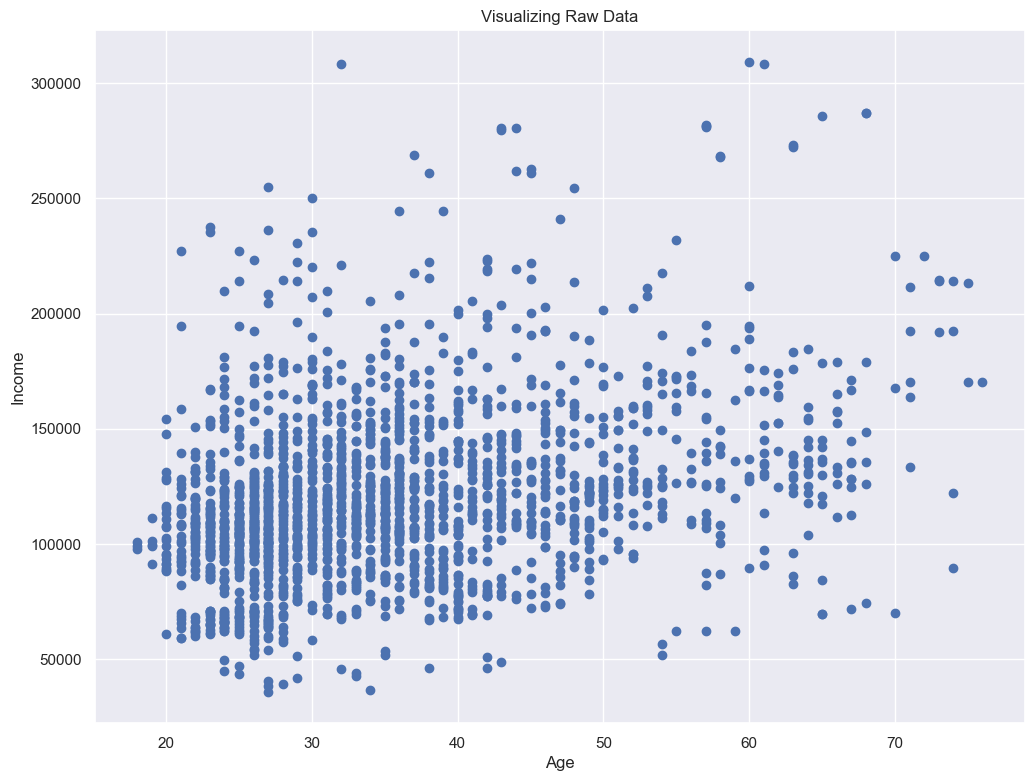

In [6]:
plt.figure(figsize= (12,9))
plt.scatter(df_segmentation.Age,df_segmentation.Income)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title("Visualizing Raw Data")

Text(0.5, 1.0, 'Visualizing Raw Data')

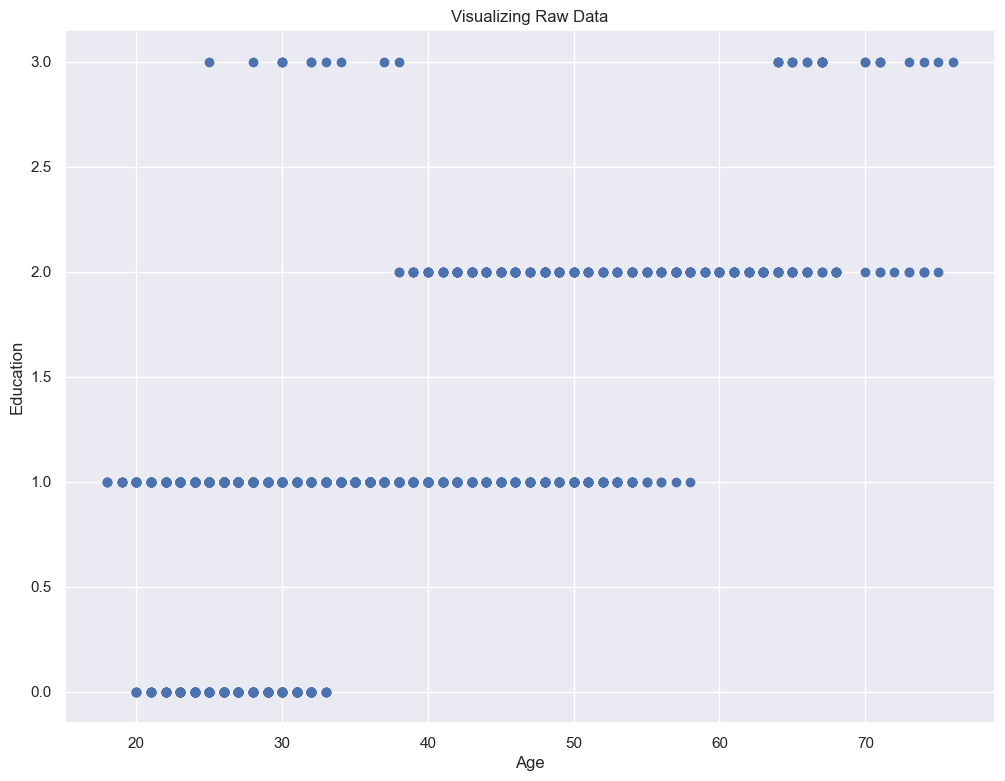

In [7]:
plt.figure(figsize= (12,9))
plt.scatter(df_segmentation.Age,df_segmentation.Education)
plt.xlabel('Age')
plt.ylabel('Education')
plt.title("Visualizing Raw Data")

# Statistical Pre-processing

# Standardization


In [8]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

#  Hierarchical Clustering

In [9]:
hier_clust = linkage(segmentation_std, method= "ward")

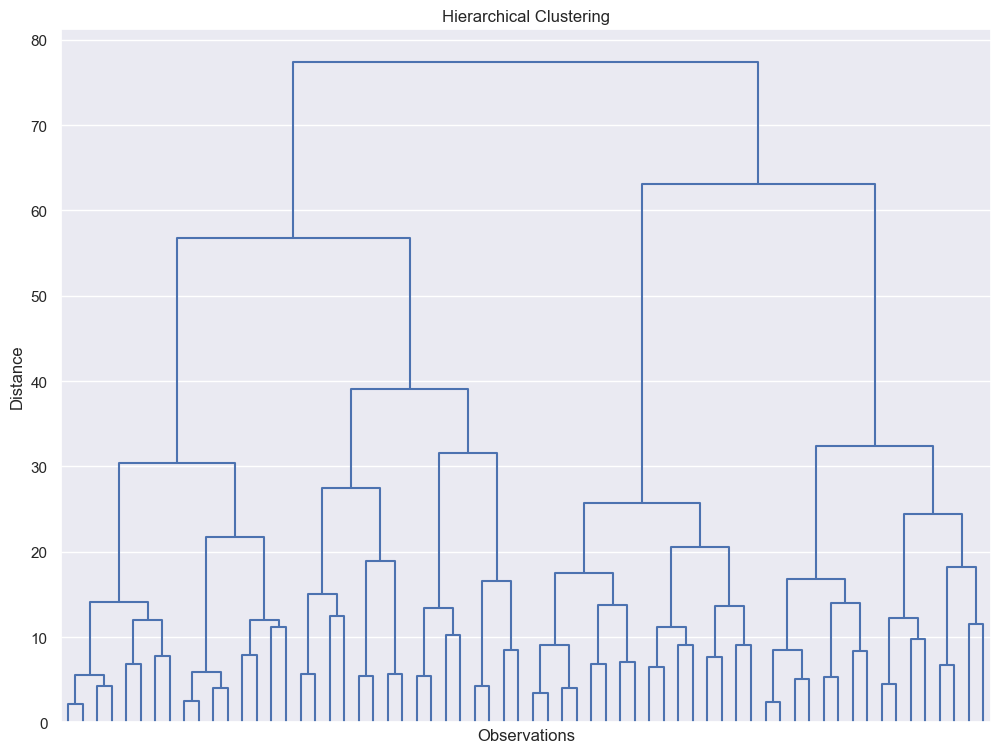

In [10]:
plt.figure(figsize= (12,9))
plt.title('Hierarchical Clustering')
plt.xlabel('Observations')
plt.ylabel('Distance')

dendrogram(hier_clust, show_leaf_counts=False,
           truncate_mode= 'level',
           p= 5,# last 5 clustered levels
           no_labels=True,
           color_threshold=0)

plt.show()

To select an adecuate clustering division, we need to look for the longest vertical line in the set. But kepp in mind it should not be crossed by verstical lines.

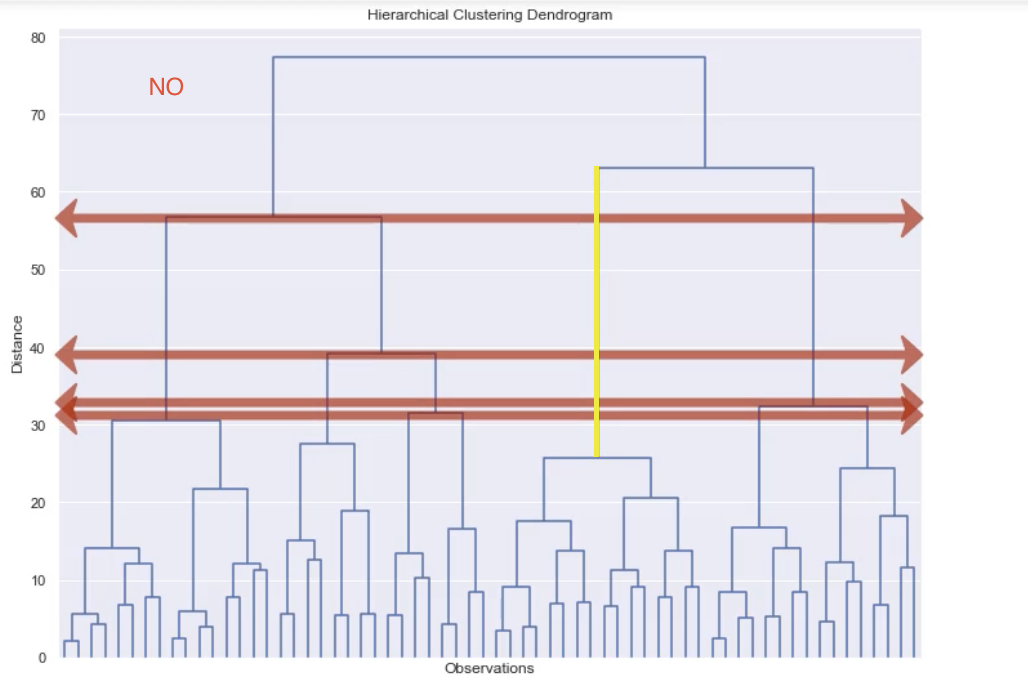

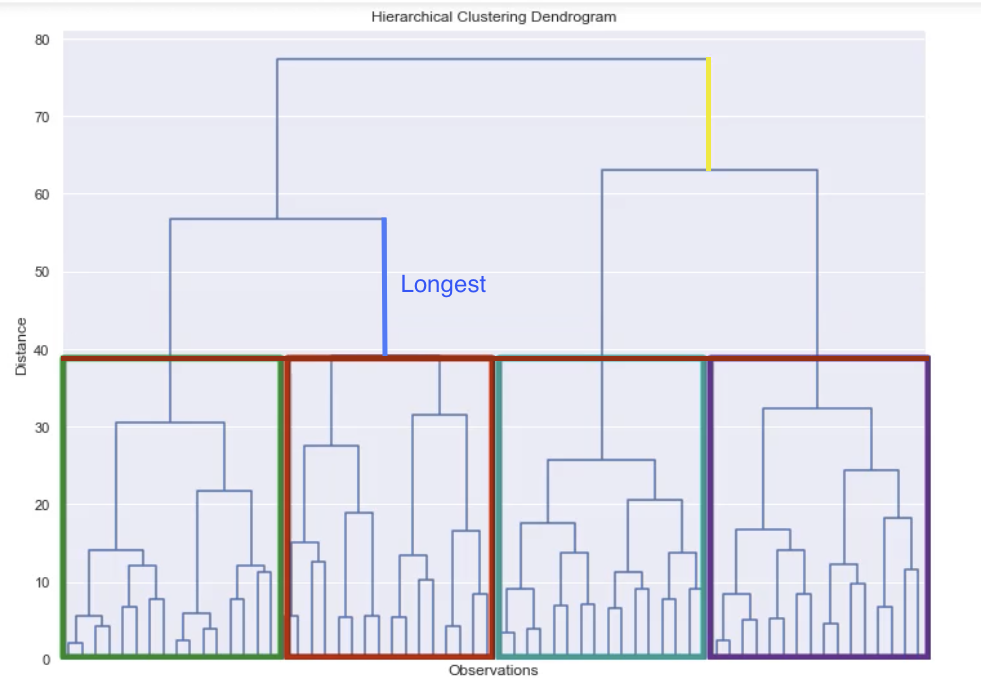

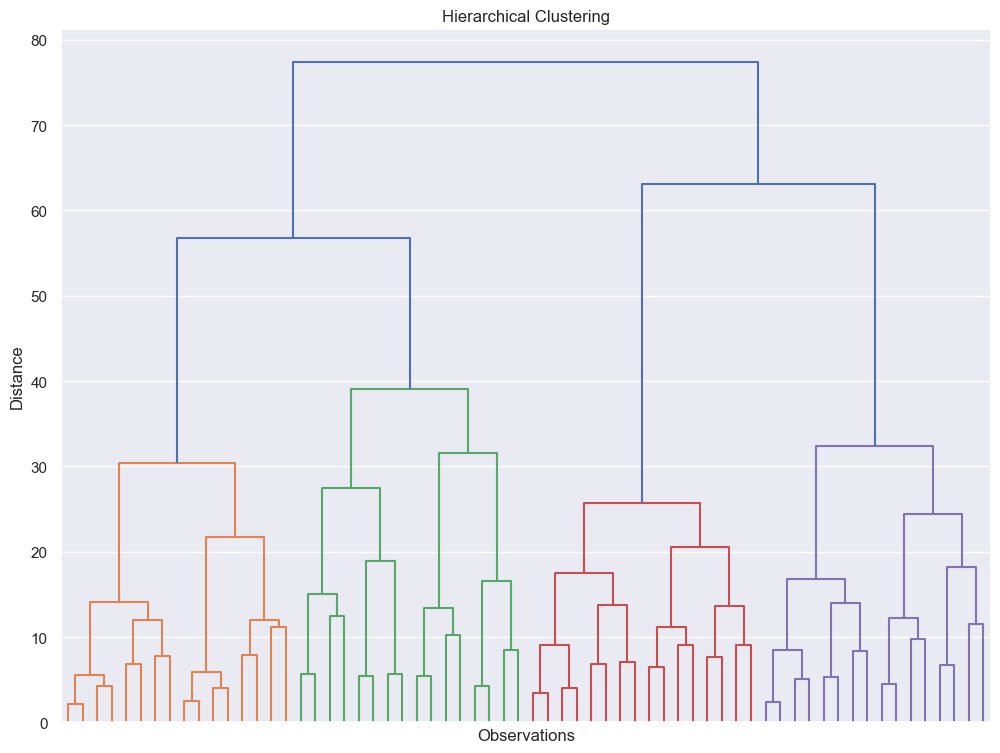

In [11]:
plt.figure(figsize= (12,9))
plt.title('Hierarchical Clustering')
plt.xlabel('Observations')
plt.ylabel('Distance')

dendrogram(hier_clust, show_leaf_counts=False,
           truncate_mode= 'level',
           p= 5,# last 5 clustered levels
           no_labels=True)

plt.show()

# K-mean Clustering

In [12]:
wcss  = []

for k in range(1,11,1):
    kmeans = KMeans(n_clusters=k, init= "k-means++", random_state=219)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/lib/python3.12/site-packages/sklearn/u

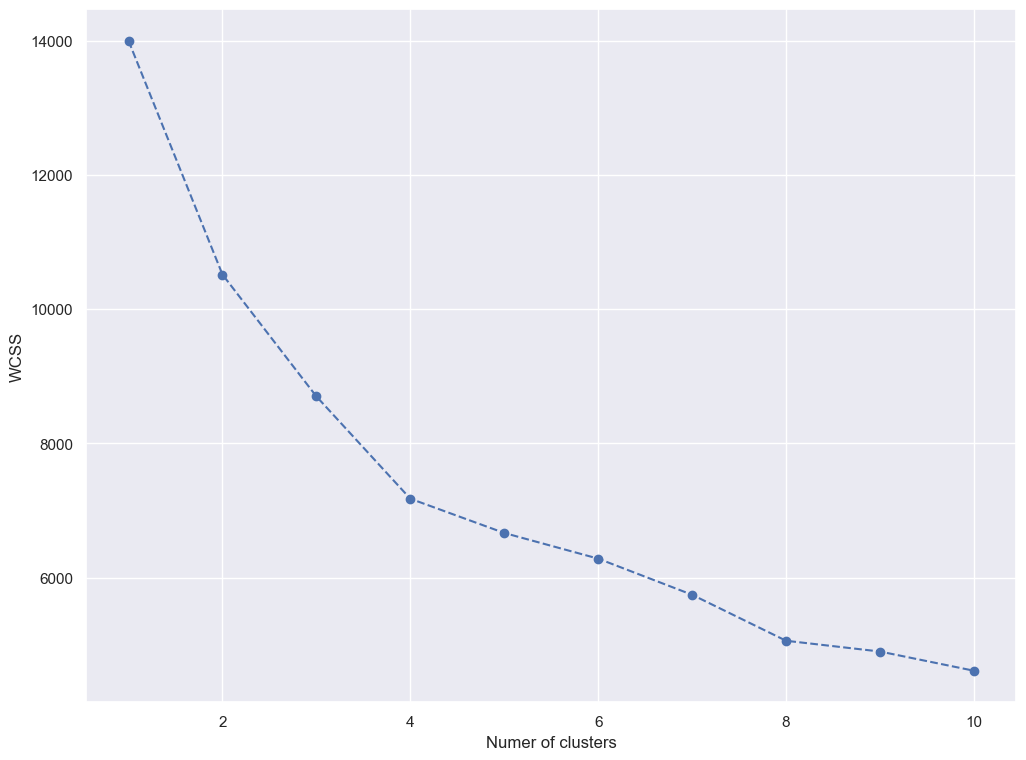

In [13]:
plt.figure(figsize= (12,9))
plt.plot(range(1,11), wcss, marker = 'o', linestyle= '--')
plt.xlabel('Numer of clusters')
plt.ylabel('WCSS')

plt.show()


In [14]:
kmeans = KMeans(n_clusters= 4, init= 'k-means++', random_state= 219)

In [15]:
kmeans.fit(segmentation_std)

/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul
  current_pot = closest_dist_sq @ sample_weight


KMeans(n_clusters=4, random_state=219)

In [16]:
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [17]:
df_segm_analysis = df_segm_kmeans.groupby(["Segment K-means"]).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.327273,0.086869,35.149495,0.771717,96173.808081,0.307071,0.040404
1,0.026408,0.172535,35.674296,0.732394,141106.498239,1.271127,1.524648
2,0.897474,0.995542,28.906389,1.063893,107558.857355,0.668648,0.445765
3,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061


In [18]:
df_segm_analysis['Num_Observations'] = df_segm_kmeans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()
df_segm_analysis['Poportion_Obs'] = df_segm_analysis['Num_Observations']/df_segm_analysis['Num_Observations'].sum()

In [19]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Num_Observations,Poportion_Obs
Segment K-means,,,,,,,,,
0,0.327273,0.086869,35.149495,0.771717,96173.808081,0.307071,0.040404,495,0.247500
1,0.026408,0.172535,35.674296,0.732394,141106.498239,1.271127,1.524648,568,0.284000
2,0.897474,0.995542,28.906389,1.063893,107558.857355,0.668648,0.445765,673,0.336500
3,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,264,0.132000


In [20]:
df_segm_analysis.rename({0:'Low-Opportunities',
                         1:'Workaholics',
                         2:'Standard Fam',
                         3:'Well-Off'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Num_Observations,Poportion_Obs
Segment K-means,,,,,,,,,
Low-Opportunities,0.327273,0.086869,35.149495,0.771717,96173.808081,0.307071,0.040404,495,0.247500
Workaholics,0.026408,0.172535,35.674296,0.732394,141106.498239,1.271127,1.524648,568,0.284000
Standard Fam,0.897474,0.995542,28.906389,1.063893,107558.857355,0.668648,0.445765,673,0.336500
Well-Off,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,264,0.132000


In [21]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'Low-Opportunities',
                                                                  1:'Workaholics',
                                                                  2:'Standard Fam',
                                                                  3:'Well-Off'})

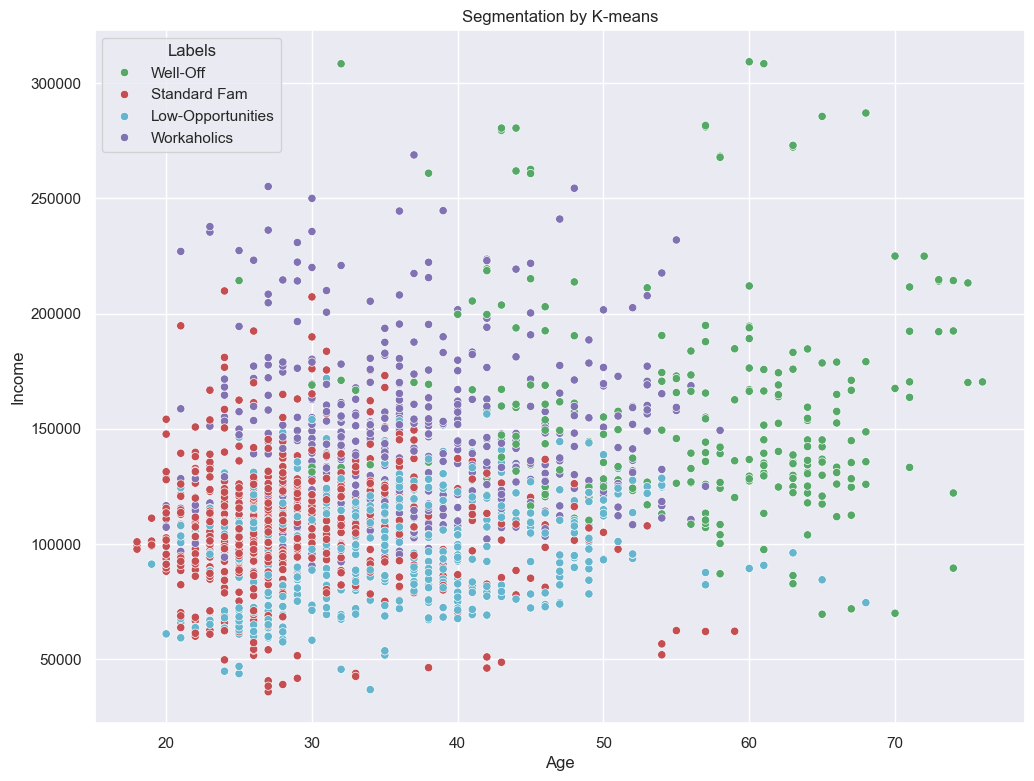

In [22]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize=(12,9))
sns.scatterplot(x= x_axis,y= y_axis, hue= df_segm_kmeans['Labels'], palette= ['g','r','c','m'])
plt.title('Segmentation by K-means')
plt.show()

# Principal Component Analysis

In [23]:
pca = PCA()

In [24]:
pca.fit(segmentation_std)

PCA()

In [25]:
pca.explained_variance_ratio_ #ordered from most to least important

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0.5, 1.0, 'Explained Variance by Component')

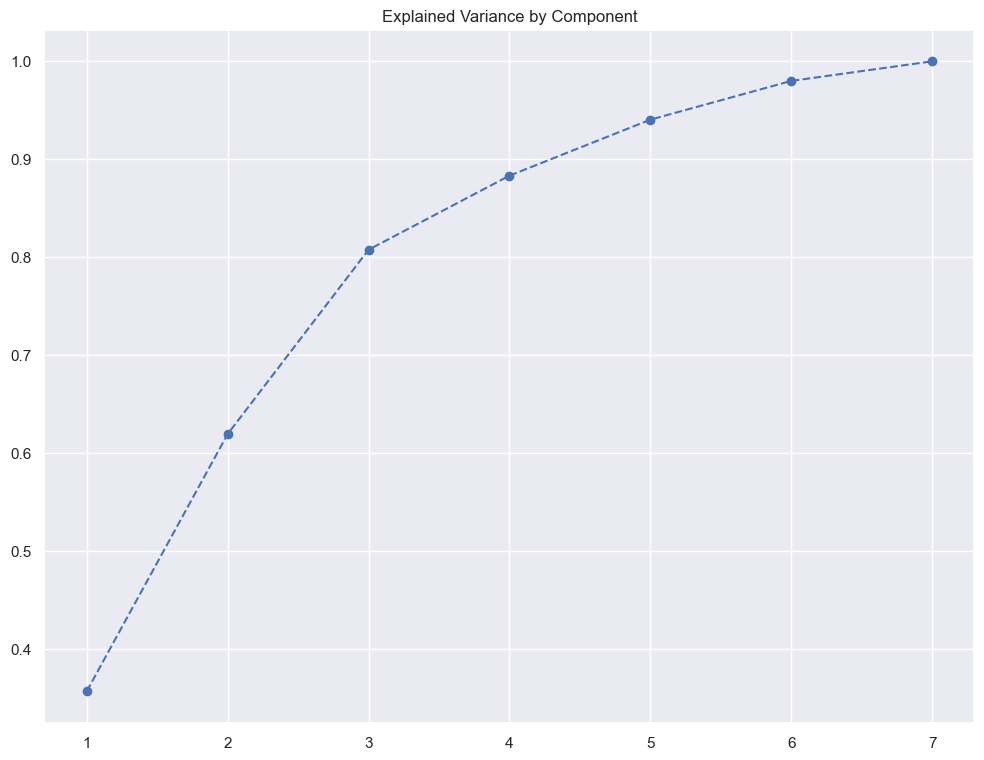

In [26]:
plt.figure(figsize=(12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o',linestyle= '--')
plt.title('Explained Variance by Component')

## Checking with 3 components

In [27]:
pca_3 = PCA(n_components=3)
pca_3.fit(segmentation_std)

PCA(n_components=3)

In [28]:
pca_3.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [29]:
df_pca3_comp = pd.DataFrame(data= pca_3.components_,
                            columns= df_segmentation.columns.values,
                            index= ['Component 1', 'Component 2', 'Component 3'])

df_pca3_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


([<matplotlib.axis.YTick at 0x11feb4230>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3')])

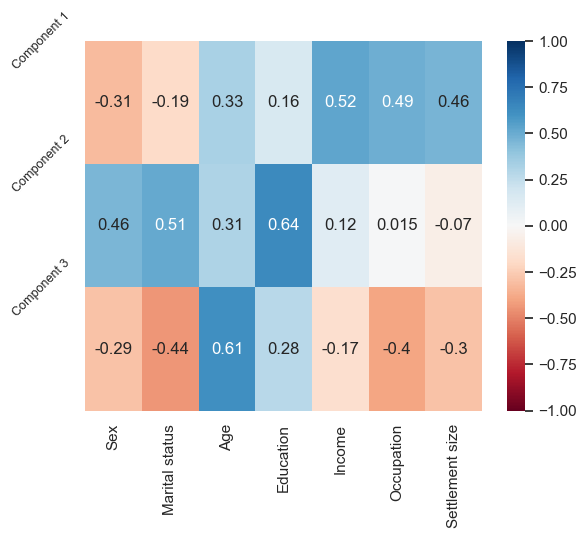

In [30]:
sns.heatmap(df_pca3_comp,
            vmin=-1,
            vmax=1,
            cmap= "RdBu",
            annot=True)
plt.yticks([0,1,2],
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 9)

In [31]:
score_pca4 = pca_3.transform(segmentation_std)

/opt/miniconda3/lib/python3.12/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/opt/miniconda3/lib/python3.12/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/opt/miniconda3/lib/python3.12/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T


In [32]:
pca_4 = PCA(n_components=4)
pca_4.fit(segmentation_std)

PCA(n_components=4)

In [33]:
pca_4.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503],
       [-0.31560091,  0.28045392, -0.00950602,  0.18147643, -0.48260023,
        -0.28169039,  0.69026455]])

In [34]:
df_pca4_comp = pd.DataFrame(data= pca_4.components_,
                            columns= df_segmentation.columns.values,
                            index= ['Component 1', 'Component 2', 'Component 3','Component 4'])

df_pca4_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685
Component 4,-0.315601,0.280454,-0.009506,0.181476,-0.482600,-0.281690,0.690265


([<matplotlib.axis.YTick at 0x11ff6a8d0>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3'),
  Text(0, 3, 'Component 4')])

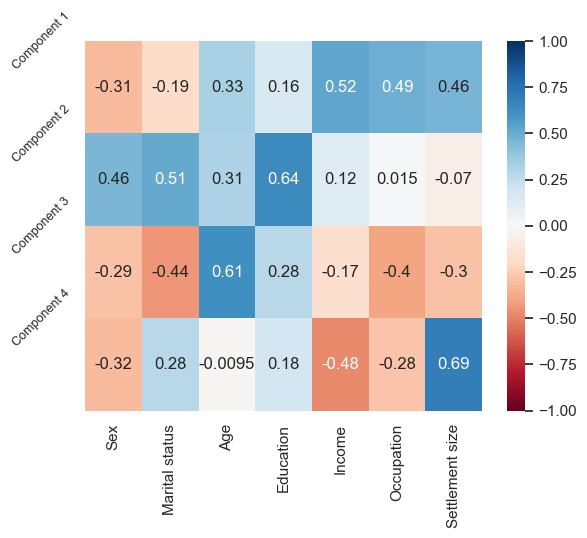

In [35]:
sns.heatmap(df_pca4_comp,
            vmin=-1,
            vmax=1,
            cmap= "RdBu",
            annot=True)
plt.yticks([0,1,2,3],
           ['Component 1', 'Component 2', 'Component 3','Component 4'],
           rotation = 45,
           fontsize = 9)

In [36]:
score_pca4 = pca_4.transform(segmentation_std)
score_pca4 

/opt/miniconda3/lib/python3.12/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/opt/miniconda3/lib/python3.12/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/opt/miniconda3/lib/python3.12/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T


array([[ 2.51474593,  0.83412239,  2.1748059 ,  1.21779432],
       [ 0.34493528,  0.59814564, -2.21160279,  0.54838542],
       [-0.65106267, -0.68009318,  2.2804186 ,  0.12067518],
       ...,
       [-1.45229829, -2.23593665,  0.89657125, -0.13177412],
       [-2.24145254,  0.62710847, -0.53045631, -0.04260559],
       [-1.86688505, -2.45467234,  0.66262172,  0.10089556]],
      shape=(2000, 4))

# K-mean Clustering with PCA

In [37]:
wcss  = []

for k in range(1,11,1):
    kmeans_pca = KMeans(n_clusters=k, init= "k-means++", random_state=219)
    kmeans_pca.fit(score_pca4)
    wcss.append(kmeans_pca.inertia_)

/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/lib/python3.12/site-packages/sklearn/u

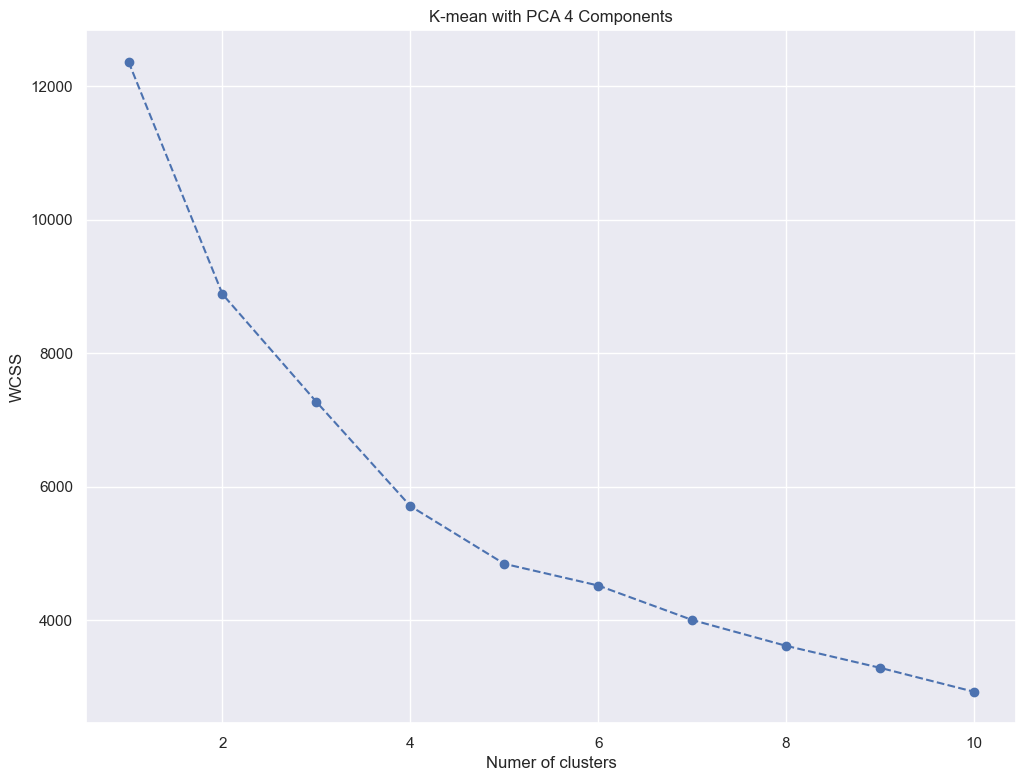

In [38]:
plt.figure(figsize= (12,9))
plt.plot(range(1,11), wcss, marker = 'o', linestyle= '--')
plt.xlabel('Numer of clusters')
plt.ylabel('WCSS')
plt.title('K-mean with PCA 4 Components')

plt.show()

In [39]:
kmean_pca4 = KMeans(n_clusters=4, init='k-means++',random_state=219)


In [40]:
kmean_pca4.fit(score_pca4)


/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul
  current_pot = closest_dist_sq @ sample_weight


KMeans(n_clusters=4, random_state=219)

# Kmean Clustering with PCA

In [41]:
df_segm_pca4_kmeans = pd.concat([df_segmentation.reset_index(drop=True), pd.DataFrame(score_pca4)], axis=1)
df_segm_pca4_kmeans.columns.values[-4:] = ['Component 1','Component 2','Component 3','Component 4']
df_segm_pca4_kmeans['Segment K-mean PCA4'] = kmean_pca4.labels_

In [42]:
df_segm_pca4_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Component 4,Segment K-mean PCA4
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,1.217794,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0.548385,1
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0.120675,0
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,-0.510753,2
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,-0.231808,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,-0.945916,0
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,-0.736766,1
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,-0.131774,0
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,-0.042606,0


In [43]:
df_segm_pca4_kmeans_freq = df_segm_pca4_kmeans.groupby(['Segment K-mean PCA4']).mean()
df_segm_pca4_kmeans_freq


# WE are assuming this based on the heatmap of PCA4
#'Component 1' is related to Career~
#'Component 2' is related to Education lifestyle~
#'Component 3' is related to Life Experience~S
#'Component 4' is related to General lifestyle~

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Component 4
Segment K-mean PCA4,,,,,,,,,,,
0,0.628713,0.450495,33.290429,0.935644,88696.348185,0.082508,0.008251,-1.613798,-0.127927,0.613634,-0.054572
1,0.753296,0.977401,27.947269,1.007533,119986.256121,1.056497,0.828625,-0.373580,0.515618,-1.208405,0.059150
2,0.001675,0.033501,36.711893,0.681742,138519.859296,1.201005,1.249581,1.229271,-1.229395,0.050985,-0.040649
3,0.496241,0.680451,55.966165,2.131579,156954.109023,1.101504,1.078947,1.663375,2.021350,0.899861,0.097479


In [44]:
df_segm_pca4_kmeans_freq['Num_Observations'] = df_segm_pca4_kmeans[['Segment K-mean PCA4','Sex']].groupby(['Segment K-mean PCA4']).count()
df_segm_pca4_kmeans_freq['Poportion_Obs'] = df_segm_pca4_kmeans_freq['Num_Observations']/df_segm_pca4_kmeans_freq['Num_Observations'].sum()
df_segm_pca4_kmeans_freq = df_segm_pca4_kmeans_freq.rename({0:'Low-Opportunities',
                                                                  1:'Standard Fam',
                                                                  2:'Workaholics',
                                                                  3:'Well-Off'})

df_segm_pca4_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Component 4,Num_Observations,Poportion_Obs
Segment K-mean PCA4,,,,,,,,,,,,,
Low-Opportunities,0.628713,0.450495,33.290429,0.935644,88696.348185,0.082508,0.008251,-1.613798,-0.127927,0.613634,-0.054572,606,0.303000
Standard Fam,0.753296,0.977401,27.947269,1.007533,119986.256121,1.056497,0.828625,-0.373580,0.515618,-1.208405,0.059150,531,0.265500
Workaholics,0.001675,0.033501,36.711893,0.681742,138519.859296,1.201005,1.249581,1.229271,-1.229395,0.050985,-0.040649,597,0.298500
Well-Off,0.496241,0.680451,55.966165,2.131579,156954.109023,1.101504,1.078947,1.663375,2.021350,0.899861,0.097479,266,0.133000


In [45]:
df_segm_pca4_kmeans['Legend'] = df_segm_pca4_kmeans['Segment K-mean PCA4'].map({0:'Low-Opportunities',
                                                                  1:'Standard Fam',
                                                                  2:'Workaholics',
                                                                  3:'Well-Off'})

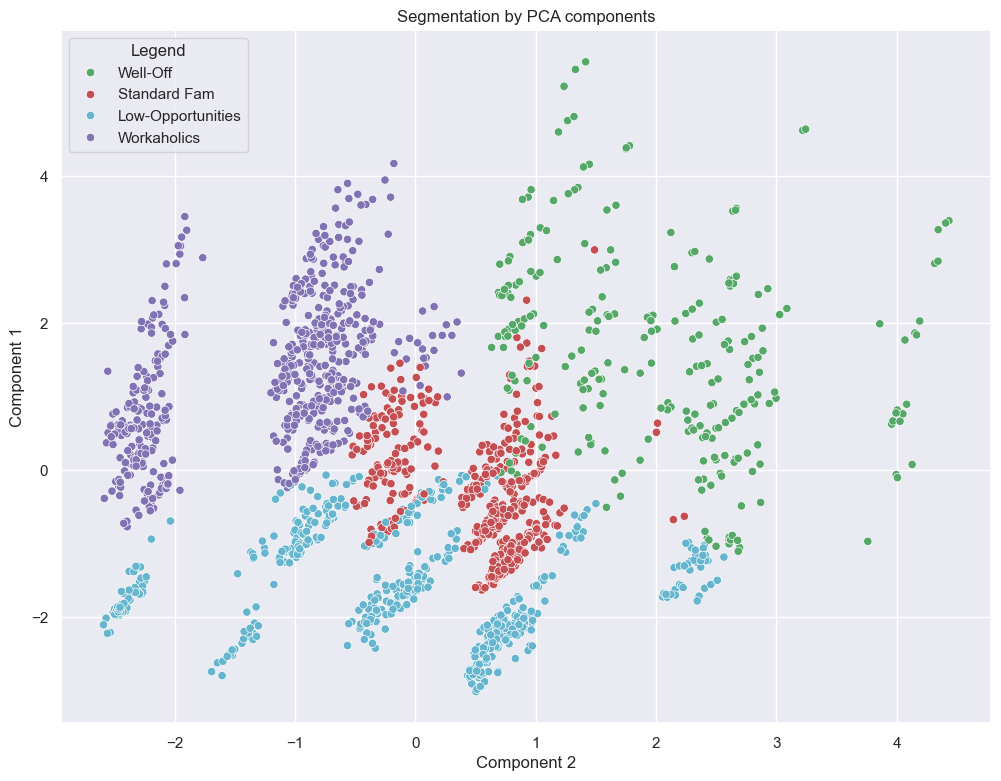

In [46]:
x_axis = df_segm_pca4_kmeans['Component 2']
y_axis = df_segm_pca4_kmeans['Component 1']
plt.figure(figsize=(12,9))
sns.scatterplot(x= x_axis,y= y_axis, hue= df_segm_pca4_kmeans['Legend'], palette= ['g','r','c','m'])
plt.title('Segmentation by PCA components')
plt.show()

# Data Export

In [47]:

pickle.dump(scaler, open('./Pickle_jar/Scaler.pickle','wb'))

In [48]:
pickle.dump(pca_4, open('./Pickle_jar/pca.pickle','wb'))

In [49]:
pickle.dump(kmean_pca4, open('./Pickle_jar/kmean_pca4', 'wb'))